In [12]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import glob
import os
import tables as tb

from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as m3d
import math
from matplotlib import image
import matplotlib.pyplot as plt

import seaborn as sns
import sys
import pickle
import time
import re

In [13]:
datfiles='./reconstructedAngularDistrMuonFlux-mss-LAB2400-finalNumbers.csv'

In [14]:
MuonMeas = pd.read_csv(datfiles, delimiter=',',header=None).values
muon_data=pd.DataFrame(data=MuonMeas, columns=["phi", "theta","flux"])
muon_data=muon_data[muon_data.theta<80]

In [15]:

cols = [ 'theta', 'phi','flux']
muon_data = muon_data[cols]


for PHI in muon_data.phi.unique():
    avg=muon_data[(muon_data.theta<=4) & (muon_data.theta>=1) & (muon_data.phi==PHI)].flux.mean()
    muon_data['flux'].loc[(muon_data.phi==PHI) & (muon_data.theta<=4)]=avg
    
muon_data['phi']=muon_data['phi'].map(lambda phi: np.radians(phi))

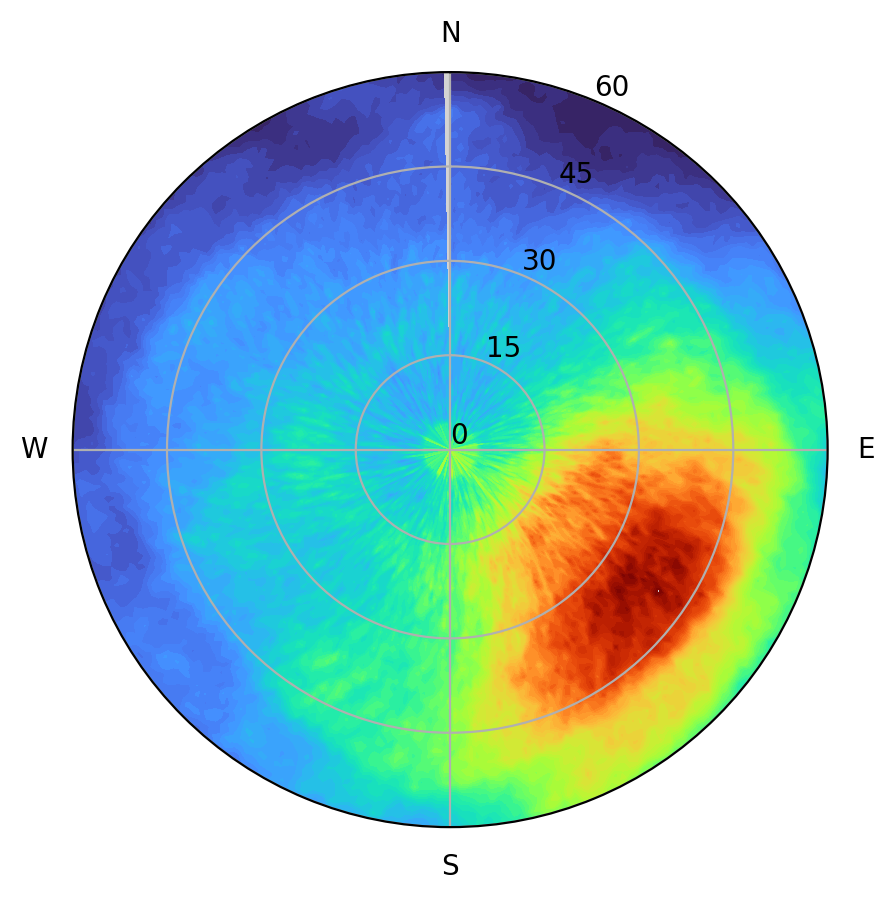

In [44]:
rmu, thetamu = np.meshgrid(muon_data.theta.unique(), muon_data.phi.unique())

valuesmu=np.array(muon_data.flux/10**4)
valuesmu = valuesmu.reshape(len(muon_data.phi.unique()), len(muon_data.theta.unique()))
 
#to put north on top

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),figsize=(5,5),dpi=200)
fig.patch.set_facecolor('white')
levels=np.linspace(0,3.3e-7,65)


im=ax.contourf(thetamu, rmu, valuesmu,levels=levels, cmap=plt.cm.turbo)




ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rticks([0,15,30,45,60])
ax.set_rlim(0,60)

#fig.colorbar(im,ticks=np.arange(0,3.5e-7,5e-8))
ax.set_thetagrids([0,90,180,270],['N','E','S','W'])
ax.set(facecolor = "lightgrey",alpha=0.2)
cb.set_label("Muon Flux [10$^{-4}$m$^{2}$s$^{-1}$sr$^{-1}$]")
plt.show()



#cax=ax.contourf(thetamu, rmu, valuesmu,60, cmap=plt.cm.nipy_spectral)





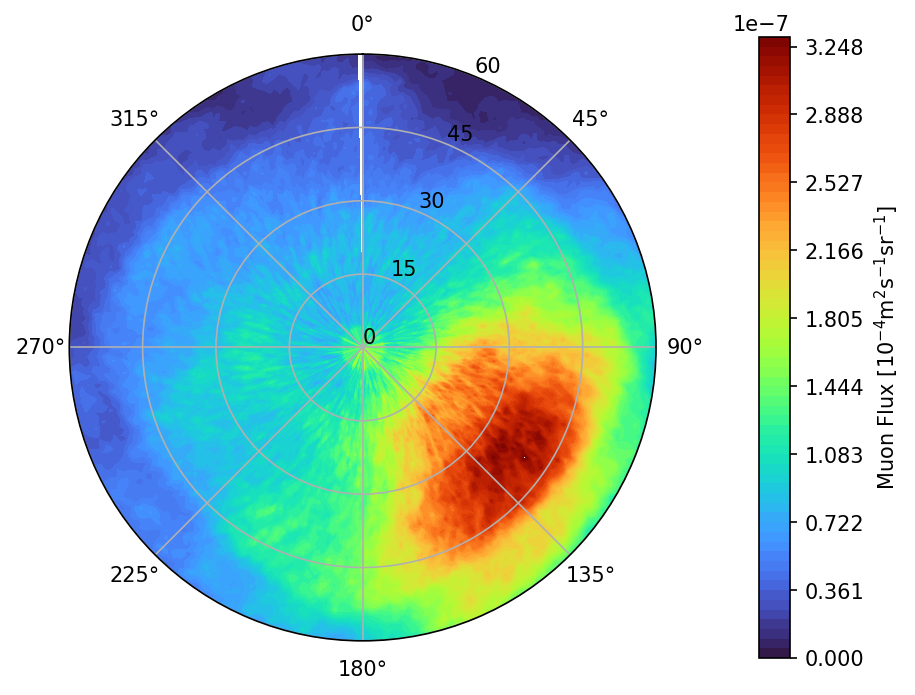

In [32]:
rmu, thetamu = np.meshgrid(muon_data.theta.unique(), muon_data.phi.unique())

valuesmu=np.array(muon_data.flux/10**4)
valuesmu = valuesmu.reshape(len(muon_data.phi.unique()), len(muon_data.theta.unique()))
 
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),constrained_layout=True,figsize=(6,6),dpi=150,facecolor='white')
levels=np.linspace(0,3.3e-7,65)



#to put north on top
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rticks([0,15,30,45,60])
ax.set_rlim(0,60)
#cax=ax.contourf(thetamu, rmu, valuesmu,60, cmap=plt.cm.nipy_spectral)
cax=ax.contourf(thetamu, rmu, valuesmu,levels=levels, cmap=plt.cm.turbo)
cb = fig.colorbar(cax, shrink=0.7)

#ax.scatter(np.deg2rad(115),60,marker='X',color='k')
cb.set_label("Muon Flux [10$^{-4}$m$^{2}$s$^{-1}$sr$^{-1}$]")
plt.show()

In [8]:
muon_data.theta.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79.])

In [29]:
max(muon_data.flux)

0.00336137